<a href="https://colab.research.google.com/github/josh-kindhart/Python-Practice/blob/main/Stock%20Data%20Web%20Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipympl
!pip install mplfinance
from google.colab import output
output.enable_custom_widget_manager()

In [2]:
import os
import mplfinance as mpf
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

website = 'https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-alphavantage'
api_key = '26E0EWOJLXTIUY3V'

df = web.DataReader("AAPL", "av-intraday", start=datetime(2023, 8, 14), end=datetime(2023, 8, 15),
                          api_key=api_key)

In [3]:
df['DateTime'] = df.index
df.reset_index(drop=True, inplace=True)
df.columns = ['Open','High','Low','Close','Volume','DateTime']
df = df[['DateTime','Open','High','Low','Close','Volume']]
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [4]:
display(df.head())

,DateTime,Open,High,Low,Close,Volume
0,2023-08-14 04:00:00,179.35,179.35,177.73,178.59,10141
1,2023-08-14 04:01:00,178.55,179.45,178.37,178.95,9517
2,2023-08-14 04:02:00,179.00,179.04,178.86,179.04,1684
3,2023-08-14 04:03:00,179.14,179.19,179.00,179.10,4146
4,2023-08-14 04:04:00,179.07,179.07,178.83,178.95,3125


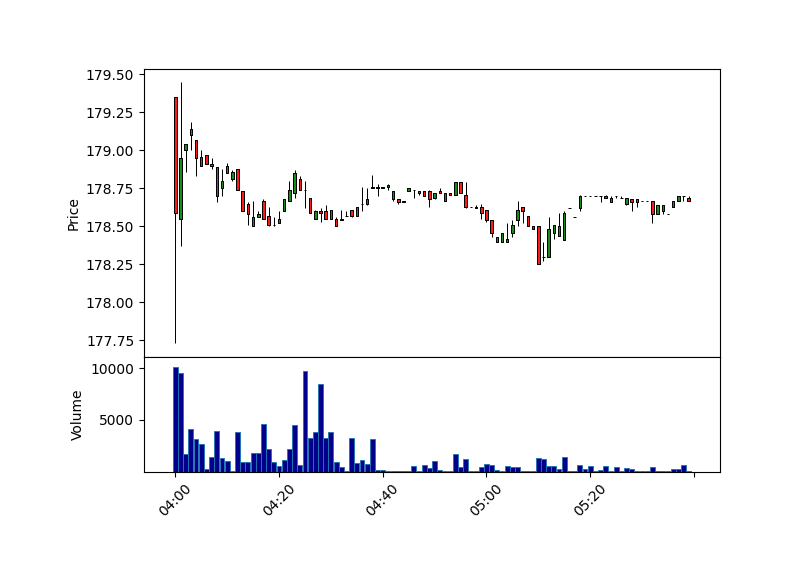

In [21]:
%matplotlib ipympl
df.index = df['DateTime']
mc =mpf.make_marketcolors(up='green', down='red', volume='darkblue')
s =mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df.head(100), type='candle', volume=True, style=s)